## According to a 2010 report made by the US Federal Aviation Administration, the economic price of domestic flight delays entails a yearly cost of 32.9 billion dollars to passengers, airlines and other parts of the economy. More than half of that amount comes from the pockets of passengers who not only lose time waiting for their planes to leave, but they also miss connecting flights, spend money on food and have to sleep on hotel rooms while they're stranded. 

## The report, focusing on data from year 2007, estimated that air transportation delays put a 4 billion dollar dent in the country's gross domestic product that year. Full report can be found [here](http://www.isr.umd.edu/NEXTOR/pubs/TDI_Report_Final_10_18_10_V3.pdf).

## But, what are the causes for these delays?

### In order to answer this question, we are going to analyze the provided dataset, containing up to 1.936.758 different internal flights in the US for 2008 and their causes for delay, diversion and cancellation; if any. 

### The data comes from the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS). 

### The results are tentative.


# This dataset is composed by the following variables: 

1.	**Year**	2008
2.	**Month**	1-12
3.	**DayofMonth**	1-31
4.	**DayOfWeek**	1 (Monday) - 7 (Sunday)
5.	**DepTime**	actual departure time (local, hhmm)
6.	**CRSDepTime**	scheduled departure time (local, hhmm)
7.	**ArrTime**	actual arrival time (local, hhmm)
8.	**CRSArrTime**	scheduled arrival time (local, hhmm)
9.	**UniqueCarrier**	unique carrier code
10.	**FlightNum**	flight number
11.	**TailNum** plane tail number: aircraft registration, unique aircraft identifier
12.	**ActualElapsedTime**	in minutes
13.	**CRSElapsedTime**	in minutes
14.	**AirTime**	in minutes
15.	**ArrDelay**	arrival delay, in minutes: **A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).** 
16.	**DepDelay**	departure delay, in minutes
17.	**Origin**	origin IATA airport code
18.	**Dest**	destination IATA airport code
19.	**Distance**	in miles
20.	**TaxiIn**	taxi in time, in minutes
21.	**TaxiOut**	taxi out time in minutes
22.	**Cancelled**	*was the flight cancelled
23.	**CancellationCode**	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
24.	**Diverted**	1 = yes, 0 = no
25.	**CarrierDelay**	in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
26.	**WeatherDelay**	in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
27.	**NASDelay**	in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc. 
28.	**SecurityDelay**	in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
29.	**LateAircraftDelay**	in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

# 1. Understanding and preparing the the data

In [31]:
#import needed libraries 
from pandas import read_csv

In [32]:
# Reading and showing head data

data = read_csv("./DelayedFlights.csv")
data.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [33]:
data = data.drop("Unnamed: 0",1)

In [34]:
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


# 2. Exploratory Data analysis

Perform explorartory data analysis of your choice (#Consider location and number of flights for answering part one of question.)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
corrmat = data.corr()

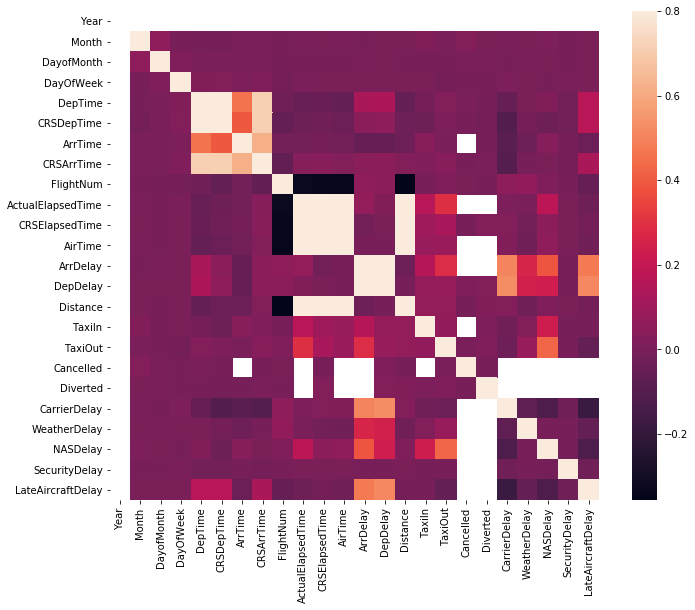

In [37]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

In [38]:
print(data['Dest'].value_counts())

ORD    108984
ATL    106898
DFW     70657
DEN     63003
LAX     59969
EWR     55861
LAS     48858
PHX     47836
SFO     46876
IAH     43905
LGA     38137
MCO     36405
JFK     35506
DTW     34777
BOS     31961
SEA     31548
PHL     30795
BWI     29610
SLC     29217
MSP     28137
CLT     26898
SAN     26621
MDW     25318
IAD     22748
TPA     22665
FLL     20323
CVG     20056
DCA     19735
MIA     19706
STL     18582
        ...  
MKG        99
BTM        86
CDC        82
LWS        68
BPT        65
RFD        64
ALO        55
SLE        54
PLN        51
CMX        49
YKM        47
GST        46
RHI        45
AKN        43
DLG        43
ACY        38
LWB        35
HTS        33
TEX        32
WYS        31
ADK        31
SUX        28
ITH        16
BLI        13
BJI        12
INL         9
PIR         3
OGD         1
TUP         1
CYS         1
Name: Dest, Length: 304, dtype: int64


In [39]:
print(data['Origin'].value_counts())

ATL    131613
ORD    125979
DFW     95414
DEN     74323
LAX     58772
IAH     56847
PHX     55720
LAS     53710
EWR     52925
DTW     43923
SFO     43801
MCO     36139
CLT     35055
JFK     34706
MSP     32436
LGA     31185
SEA     31060
BWI     30710
PHL     30316
MDW     29222
SLC     28675
BOS     28196
SAN     24828
CVG     23881
MIA     23273
IAD     22125
TPA     20199
HOU     19639
FLL     19363
DAL     18710
        ...  
LWS        88
SLE        85
SCE        82
LYH        81
AKN        72
DLG        65
CDC        64
BTM        58
YKM        55
ADK        53
TEX        52
LWB        48
GST        40
CMX        34
RFD        33
RHI        33
ALO        31
ACY        29
ITH        29
BPT        27
SUX        22
PLN        21
WYS        10
HTS        10
BLI         4
BJI         4
PIR         3
PUB         2
TUP         1
INL         1
Name: Origin, Length: 303, dtype: int64


# 3. Classification Analysis

In [40]:
# Importing metrics for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [41]:
target = ["Cancelled"]

In [42]:
leaky_features = ["Year", "Diverted", "ArrTime", "ActualElapsedTime", "AirTime", "ActualElapsedTime", "AirTime", "ArrDelay", "TaxiIn", "CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay","LateAircraftDelay", "CancellationCode"]
features = [x for x in data.columns if (x != target[0]) & (x not in leaky_features) & (len(data[x].unique().tolist()) > 1)]

In [43]:
def get_dtypes(data,features):
    output = {}
    for f in features:
        dtype = str(data[f].dtype)
        if dtype not in output.keys(): output[dtype] = [f]
        else: output[dtype] += [f]
    return output

In [44]:
dtypes = get_dtypes(data,features)

In [45]:
categories = ["Month", "DayOfWeek", "DayofMonth"]
categories += dtypes["object"]
numerics = [i for i in dtypes["int64"] if i not in categories]
numerics += dtypes["float64"]

In [46]:
data[categories].head()

,Month,DayOfWeek,DayofMonth,UniqueCarrier,TailNum,Origin,Dest
0,1,4,3,WN,N712SW,IAD,TPA
1,1,4,3,WN,N772SW,IAD,TPA
2,1,4,3,WN,N428WN,IND,BWI
3,1,4,3,WN,N464WN,IND,BWI
4,1,4,3,WN,N726SW,IND,JAX


In [47]:
data[numerics].head()

,CRSDepTime,CRSArrTime,FlightNum,Distance,DepTime,CRSElapsedTime,DepDelay,TaxiOut
0,1955,2225,335,810,2003.0,150.0,8.0,8.0
1,735,1000,3231,810,754.0,145.0,19.0,10.0
2,620,750,448,515,628.0,90.0,8.0,17.0
3,1755,1925,3920,515,1829.0,90.0,34.0,10.0
4,1915,2110,378,688,1940.0,115.0,25.0,10.0


In [48]:
for numeric in numerics: data[numeric] = data[numeric].fillna(0)
cancelled = data[data[target[0]] == 1]
not_cancelled = data[data[target[0]] == 0]

In [49]:
from pandas import concat

data = concat([cancelled, not_cancelled.sample(n=len(cancelled))],0)

In [50]:
from pandas import get_dummies

one_hot_encoded = get_dummies(data[categories].fillna("Unknown"))
X = concat([one_hot_encoded, data[numerics].fillna(0)],1)
y = data[target[0]]

In [51]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

In [52]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.893491124260355


In [53]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
#print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

accuracy is 0.7672583826429981


In [54]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

             precision    recall  f1-score   support

          0       1.00      0.01      0.02       269
          1       0.47      1.00      0.64       238

avg / total       0.75      0.48      0.31       507

[[  3 266]
 [  0 238]]
accuracy is 0.47534516765285995


In [55]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

             precision    recall  f1-score   support

          0       0.61      0.78      0.69       269
          1       0.64      0.44      0.52       238

avg / total       0.63      0.62      0.61       507

[[210  59]
 [133 105]]
accuracy is 0.621301775147929
